In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## All temperatures

In [2]:
df = pd.read_csv('data.csv',usecols=[0,3])

In [3]:
df

,date,avg_temperature
0,2023-04-13,7.10
1,2023-04-12,5.19
2,2023-04-11,8.00
3,2023-04-10,7.69
4,2023-04-09,9.30
...,...,...
9995,1995-12-01,6.40
9996,1995-11-30,9.15
9997,1995-11-29,11.50
9998,1995-11-28,9.75


In [10]:
df['avg_temperature'].to_csv('data1.csv',header=False,index=False)

In [48]:
df = pd.read_csv('data.csv',usecols=[0,3])
date = pd.to_datetime(df['date'])
df['year'] = date.dt.year
#df['month'] = date.dt.month
#df['day'] = date.dt.day
df['dayofyear'] = date.dt.dayofyear
df.columns = ['date','T','year','dayofyear']
df = df.iloc[::-1].reset_index(drop=True)
df = df[35:-103]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 35 to 9896
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       9862 non-null   object 
 1   T          9862 non-null   float64
 2   year       9862 non-null   int64  
 3   dayofyear  9862 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 308.3+ KB


In [50]:
df.head()

,date,T,year,dayofyear
35,1996-01-01,7.05,1996,1
36,1996-01-02,9.10,1996,2
37,1996-01-03,6.85,1996,3
38,1996-01-04,2.09,1996,4
39,1996-01-05,-0.10,1996,5


In [44]:
df.tail()

,date,T,dayofyear
9892,2022-12-27,8.10,361
9893,2022-12-28,5.80,362
9894,2022-12-29,4.84,363
9895,2022-12-30,7.80,364
9896,2022-12-31,5.90,365


In [82]:
T = df.pivot(index='year',columns='dayofyear',values='T').fillna(method='ffill').values

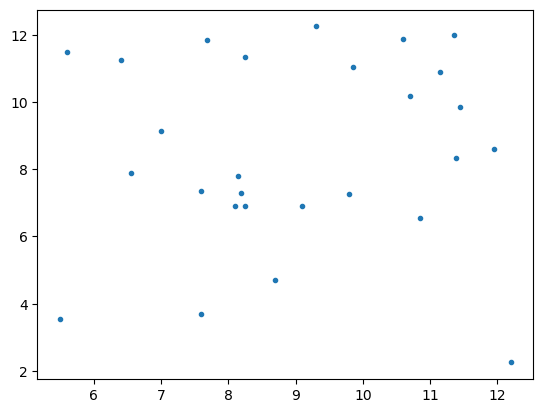

In [105]:
plt.plot(T[:,300],T[:,302],'.')

In [106]:
S = np.cov(T.T)

In [107]:
S.shape

(366, 366)

In [126]:
A = T - T.mean(axis=0)
SA = 1/367**.5*(A.T @ A)

In [127]:
SA.shape

(366, 366)

In [128]:
evals,evecs = la.eig(S)

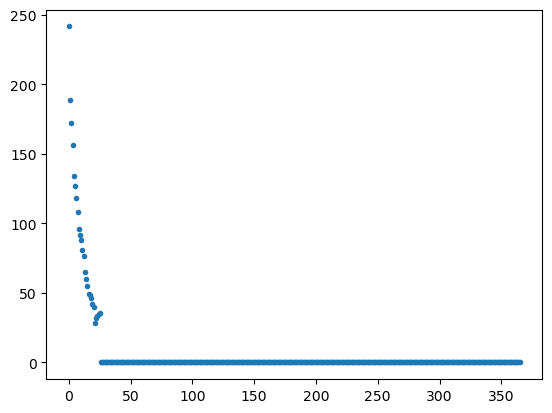

In [129]:
plt.plot(evals.real,'.')

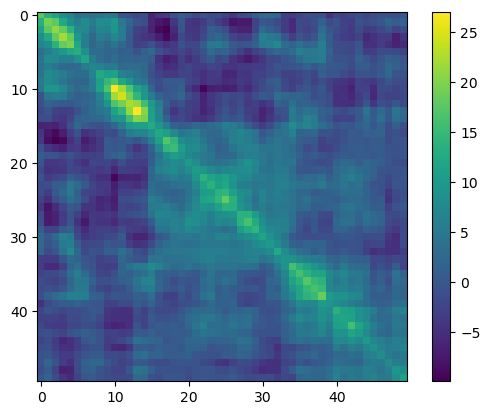

In [132]:
plt.imshow(SA[:50,:50]), plt.colorbar()
plt.show()

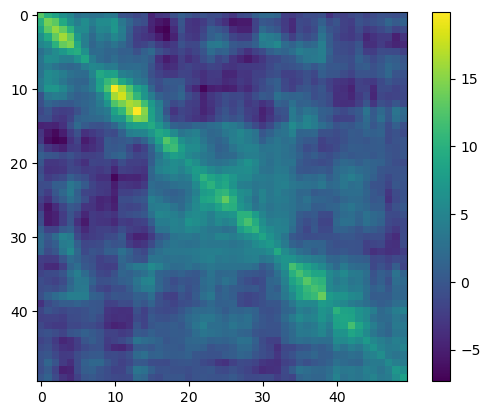

In [133]:
plt.imshow(S[:50,:50]), plt.colorbar()
plt.show()

In [97]:
import scipy.linalg as la

In [98]:
la.cholesky(S)

LinAlgError: 27-th leading minor of the array is not positive definite

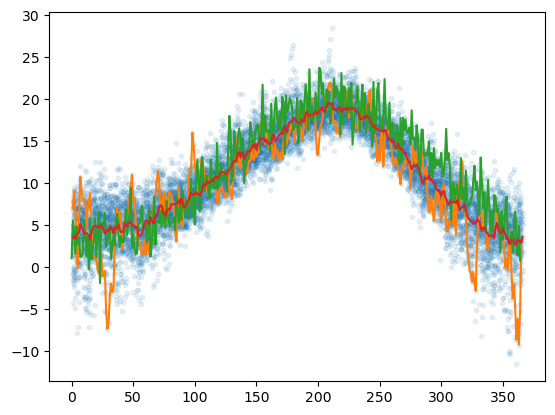

In [96]:
plt.plot(df['dayofyear'],df['T'],'.',alpha=0.1,lw=0)
plt.plot(df1['dayofyear'],df1['T'])
t = np.arange(0,365)
plt.plot(t,11.5-8*np.cos(2*np.pi*(t - 27)/365) + 2*np.random.randn(365))
Tmean = df.groupby('dayofyear').mean().loc[:,'T']
plt.plot(Tmean)
plt.show()

In [85]:
df.groupby('dayofyear').mean().loc[:,'T']

dayofyear
1      3.527143
2      3.671429
3      3.381786
4      3.877500
5      3.961786
         ...   
362    3.310357
363    3.082857
364    3.139643
365    2.901786
366    3.637143
Name: T, Length: 366, dtype: float64

In [111]:
import time
def measure():
    t = []
    go = True
    while go:
        val = input('Clock it? (Enter anything to stop): ')
        if val == '':
            t.append(time.time())
            print(t[-1])
        else:
            go = False
    return np.array(t)

In [112]:
t = measure()

Clock it? (Enter anything to stop):  


1697139774.5365188


Clock it? (Enter anything to stop):  


1697139778.233909


Clock it? (Enter anything to stop):  


1697139780.2138119


Clock it? (Enter anything to stop):  


1697139783.721882


Clock it? (Enter anything to stop):  


1697139787.7696


Clock it? (Enter anything to stop):  


1697139787.993941


Clock it? (Enter anything to stop):  


1697139790.086307


Clock it? (Enter anything to stop):  


1697139791.3756459


Clock it? (Enter anything to stop):  


1697139792.1385002


Clock it? (Enter anything to stop):  


1697139794.135038


Clock it? (Enter anything to stop):  


1697139794.310941


Clock it? (Enter anything to stop):  


1697139794.5187259


Clock it? (Enter anything to stop):  


1697139797.964779


Clock it? (Enter anything to stop):  


1697139798.45056


Clock it? (Enter anything to stop):  


1697139802.373572


Clock it? (Enter anything to stop):  


1697139803.031779


Clock it? (Enter anything to stop):  


1697139803.311133


Clock it? (Enter anything to stop):  


1697139804.1118941


Clock it? (Enter anything to stop):  


1697139805.5170088


Clock it? (Enter anything to stop):   


In [113]:
t

array([1.69713977e+09, 1.69713978e+09, 1.69713978e+09, 1.69713978e+09,
       1.69713979e+09, 1.69713979e+09, 1.69713979e+09, 1.69713979e+09,
       1.69713979e+09, 1.69713979e+09, 1.69713979e+09, 1.69713979e+09,
       1.69713980e+09, 1.69713980e+09, 1.69713980e+09, 1.69713980e+09,
       1.69713980e+09, 1.69713980e+09, 1.69713981e+09])